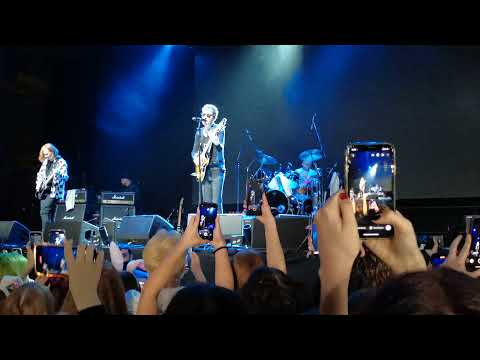

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo("vXimnr34ya4", width=800, height=450)


### Методы Монте-Карло (ММК)  
Численные методы, использующие случайные числа для моделирования процессов.  

**Суть:** многократное случайное моделирование и расчёт средних значений.  

**Применение:** физика, математика, экономика и др.  

**Название:** от района в Монако - Монте-Карло, известного колвом казино.  


In [ ]:
from IPython.display import Image

url = "https://www.nps.gov/common/uploads/cropped_image/primary/6FF1A26F-B8D2-655C-9BFF1E2A9B8F9407.jpg?width=1600&quality=90&mode=crop"
Image(url=url, width=700)

### Идея метода  

Первые предположения о связи между стохастическими процессами и дифференциальными уравнениями сделали **Энрико Ферми** (в 1930-х в Италии), а позже **Джон фон Нейман** и **Станислав Улам** (в 1940-х в **Лос-Аламосе**).  
Они предложили использовать случайные процессы (случайные числа) для аппроксимации сложных интегралов, связанных с задачами переноса нейтронов.  

### Как Улам придумал метод  

Во время выздоровления после болезни в **Лос-Аламосе** Улам играл в пасьянсы и задался вопросом: какова вероятность, что пасьянс сложится?  
Вместо сложных комбинаторных вычислений он предложил просто разыграть пасьянс много раз и посчитать долю успешных попыток.  



Так появился ОН - **Монте-Карло**.  


Идея: рандомно кидаем точки в квадрат и считаем, сколько попало в круг.

In [ ]:
np.pi

3.141592653589793

Приближённое значение π: 3.141256


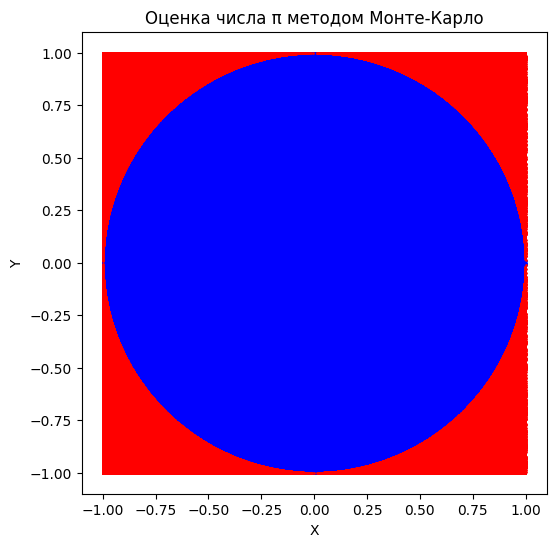

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Количество точек
n_samples = 10000000

# Генерируем случайные точки (x, y)
x = np.random.uniform(-1, 1, n_samples)
y = np.random.uniform(-1, 1, n_samples)

# Проверяем, попала ли точка в круг
inside_circle = x**2 + y**2 <= 1

# Оценка числа π
pi_estimate = (inside_circle.sum() / n_samples) * 4

print(f"Приближённое значение π: {pi_estimate:.6f}")

# Визуализация
plt.figure(figsize=(6,6))
plt.scatter(x[inside_circle], y[inside_circle], color="blue", s=1)
plt.scatter(x[~inside_circle], y[~inside_circle], color="red", s=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Оценка числа π методом Монте-Карло")
plt.show()


Идея: интеграл — это площадь под кривой, можно оценить его случайными точками.


In [ ]:
#f(x) = sin(x) * e^(-x)

<ipython-input-6-a83d0036210f>:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


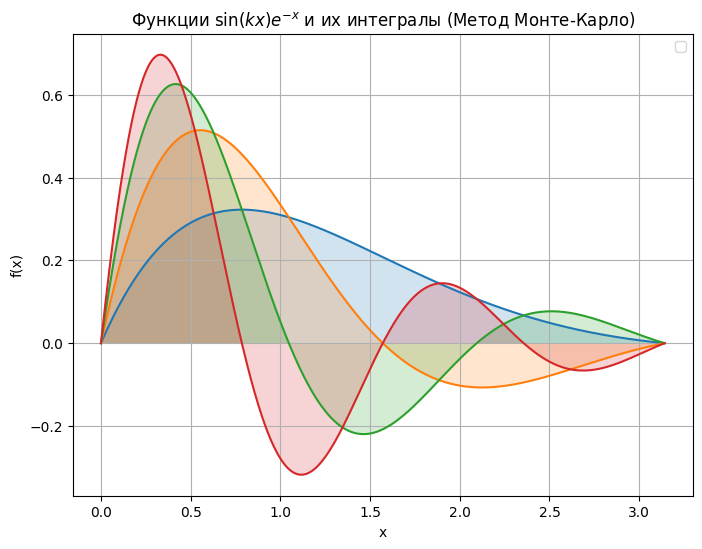

Приближённое значение интеграла для k=1: 0.550842
Приближённое значение интеграла для k=2: 0.427944
Приближённое значение интеграла для k=3: 0.326103
Приближённое значение интеграла для k=4: 0.235348


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Количество случайных точек для метода Монте-Карло
n_samples = 1000

# Генерируем случайные точки x на интервале [0, π]
x_random = np.random.uniform(0, np.pi, n_samples)

# Коэффициенты k для разных функций
k_values = [1, 2, 3, 4]

# Храним интегралы
integrals = []

# Визуализация функций
x_plot = np.linspace(0, np.pi, 1000)
plt.figure(figsize=(8, 6))

for k in k_values:
    # Вычисляем функцию f(x) = sin(kx) * e^(-x)
    y_plot = np.sin(k * x_plot) * np.exp(-x_plot)
    plt.plot(x_plot, y_plot)

    # Метод Монте-Карло: усредняем f(x) на случайных x
    integral_estimate = np.mean(np.sin(k * x_random) * np.exp(-x_random)) * np.pi
    integrals.append((k, integral_estimate))

    # Закрашивание области под графиком
    plt.fill_between(x_plot, y_plot, alpha=0.2)

# Настройки графика
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Функции $\\sin(kx) e^{-x}$ и их интегралы (Метод Монте-Карло)")
plt.legend()
plt.grid()
plt.show()

# Вывод результатов
for k, integral in integrals:
    print(f"Приближённое значение интеграла для k={k}: {integral:.6f}")


ООО "Тмыв"

In [ ]:
Выручка = CR * ARPU * (1 + Retention)

In [ ]:
?np.random.beta

In [ ]:
import numpy as np

# Количество симуляций
n_samples = 10000

# Данные A/B-теста (из 1000 пользователей)
data = {
    "A": {"CR": 130/1000, "ARPU": 50, "Retention": 0.3},
    "B": {"CR": 150/1000, "ARPU": 48, "Retention": 0.35}
}


# Генерируем случайные вероятности на основе Beta-распределения (для CR и Retention)
samples_A_CR = np.random.beta(data["A"]["CR"] * 1000 + 1, 1000 - data["A"]["CR"] * 1000 + 1, n_samples)
samples_B_CR = np.random.beta(data["B"]["CR"] * 1000 + 1, 1000 - data["B"]["CR"] * 1000 + 1, n_samples)

samples_A_ret = np.random.beta(data["A"]["Retention"] * 1000 + 1, 1000 - data["A"]["Retention"] * 1000 + 1, n_samples)
samples_B_ret = np.random.beta(data["B"]["Retention"] * 1000 + 1, 1000 - data["B"]["Retention"] * 1000 + 1, n_samples)

# ARPU считаем нормальным распределением вокруг среднего (±10%)
samples_A_ARPU = np.random.normal(data["A"]["ARPU"], data["A"]["ARPU"] * 0.1, n_samples)
samples_B_ARPU = np.random.normal(data["B"]["ARPU"], data["B"]["ARPU"] * 0.1, n_samples)




# Выручка = CR * ARPU * (1 + Retention) (Retention учитывает повторные покупки)
revenue_A = samples_A_CR * samples_A_ARPU * (1 + samples_A_ret)
revenue_B = samples_B_CR * samples_B_ARPU * (1 + samples_B_ret)

# Оцениваем вероятность, что B лучше A
p_better = np.mean(revenue_B > revenue_A)

print(f"Вероятность, что версия B принесёт больше выручки: {p_better:.2%}")


Вероятность, что версия B принесёт больше выручки: 77.31%


In [ ]:
revenue_B > revenue_A

array([ True,  True, False, ...,  True,  True,  True])

In [ ]:
?np.random.beta

(array([4.3000e+01, 6.5100e+02, 4.6320e+03, 1.6764e+04, 3.0819e+04,
        2.9187e+04, 1.3975e+04, 3.4700e+03, 4.3200e+02, 2.7000e+01]),
 array([29.31152794, 33.52327992, 37.7350319 , 41.94678388, 46.15853586,
        50.37028785, 54.58203983, 58.79379181, 63.00554379, 67.21729577,
        71.42904775]),
 <BarContainer object of 10 artists>)

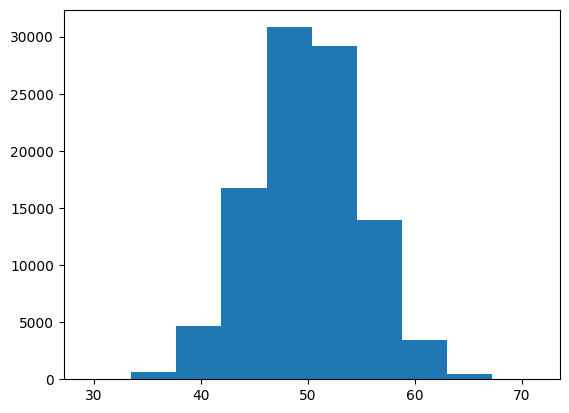

In [ ]:
plt.hist(samples_A_ARPU)

In [ ]:
(1 + samples_A_ret)

array([1.40406147, 1.39907931, 1.40607126, ..., 1.41117018, 1.40745575,
       1.37994533])

#рофл вброс не совсем монте карло

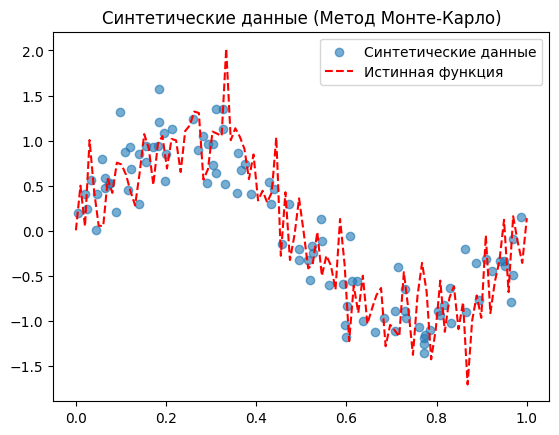

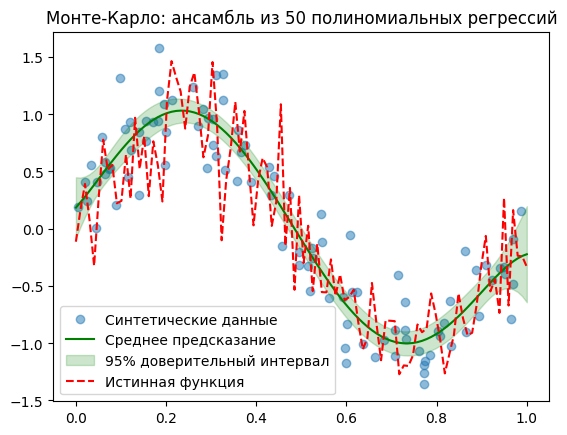

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error

# 🔹 Истинная функция
def true_function(x):
    return np.sin(2 * np.pi * x) + 0.3 * np.random.randn(*x.shape)



# 🔹 Генерация данных
np.random.seed(42)
n_samples = 100
X = np.random.rand(n_samples, 1)  # X в диапазоне [0, 1]
y = true_function(X)  # Истинная зависимость + шум

# 🔹 Визуализация данных
plt.scatter(X, y, label="Синтетические данные", alpha=0.6)
x_curve = np.linspace(0, 1, 100).reshape(-1, 1)
plt.plot(x_curve, true_function(x_curve), color='red', linestyle="dashed", label="Истинная функция")
plt.legend()
plt.title("Синтетические данные (Метод Монте-Карло)")
plt.show()

# 🔹 Параметры метода Монте-Карло
degree = 5  # Степень полинома
n_models = 50  # Количество бутстрэп-моделей
y_preds = np.zeros((n_models, len(x_curve)))  # Храним предсказания всех моделей

# 🔹 Бутстрэп-анализ (Монте-Карло)
for i in range(n_models):
    X_resampled, y_resampled = resample(X, y)  # Бутстрэп-выборка
    model = LinearRegression()
    poly = PolynomialFeatures(degree)

    X_poly_resampled = poly.fit_transform(X_resampled)
    X_poly_curve = poly.transform(x_curve)

    model.fit(X_poly_resampled, y_resampled)
    y_preds[i] = model.predict(X_poly_curve).ravel()


# 🔹 Усредняем предсказания моделей
y_pred_mean = np.mean(y_preds, axis=0)
y_pred_std = np.std(y_preds, axis=0)  # Стандартное отклонение (разброс)

# 🔹 Визуализация предсказаний
plt.scatter(X, y, label="Синтетические данные", alpha=0.5)
plt.plot(x_curve, y_pred_mean, label="Среднее предсказание", color='green')
plt.fill_between(x_curve.ravel(), y_pred_mean - 2*y_pred_std, y_pred_mean + 2*y_pred_std,
                 color='green', alpha=0.2, label="95% доверительный интервал")
plt.plot(x_curve, true_function(x_curve), color='red', linestyle="dashed", label="Истинная функция")
plt.legend()
plt.title(f"Монте-Карло: ансамбль из {n_models} полиномиальных регрессий")
plt.show()


Идея: прогноз доходности инвестиций через случайные колебания.


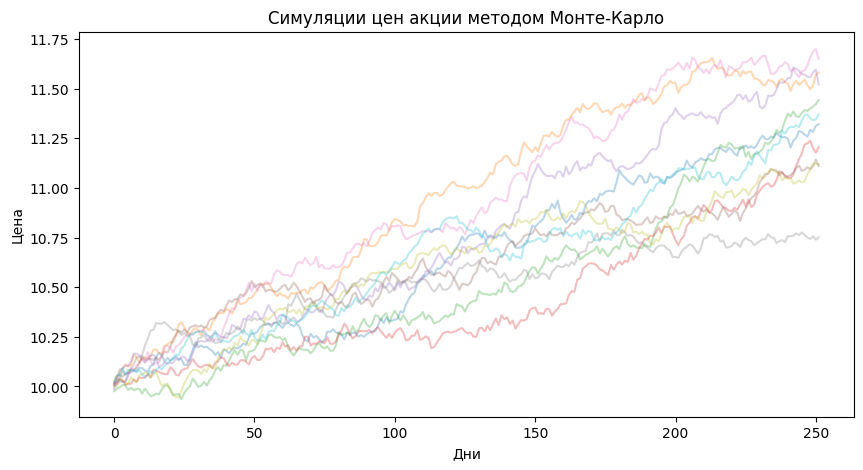

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Начальная сумма
initial_value = 10

# Дни и число симуляций
days = 252  # Год на бирже
simulations = 10

# Средняя доходность и волатильность
mu = 0.0005  # Средний рост в день
sigma = 0.002  # Стандартное отклонение

# Моделируем 100 траекторий
returns = np.random.normal(mu, sigma, (simulations, days))
prices = initial_value * np.cumprod(1 + returns, axis=1)

# Визуализация
plt.figure(figsize=(10,5))
plt.plot(prices.T, alpha=0.3)
plt.xlabel("Дни")
plt.ylabel("Цена")
plt.title("Симуляции цен акции методом Монте-Карло")
plt.show()


(array([10., 26., 51., 54., 54., 29., 19.,  5.,  3.,  1.]),
 array([-0.00391504, -0.00277372, -0.00163239, -0.00049106,  0.00065026,
         0.00179159,  0.00293292,  0.00407425,  0.00521557,  0.0063569 ,
         0.00749823]),
 <BarContainer object of 10 artists>)

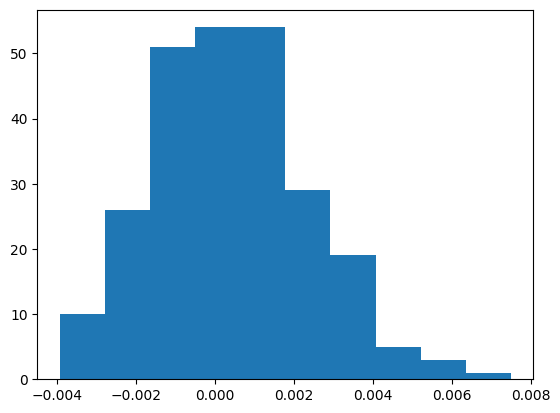

In [ ]:
plt.hist(returns[0])

In [ ]:
prices[:, -1]

array([ 7.83106897,  8.31995153,  7.45975736, 16.67557171,  5.06065068,
        8.61621529,  8.73438188,  8.01458337, 16.86900647,  6.31602654,
       10.02350152, 11.80621424,  6.65276258, 19.85513639, 18.29518857,
       10.46769331,  8.94322709,  6.7464717 ,  8.16647212,  7.91368083,
       15.16614704, 14.90654244,  9.95309682,  9.0554394 ,  6.45896496,
       11.65914843, 10.3397521 , 10.78471453,  8.66342719,  4.95481639,
        4.46468189,  8.10382278, 10.32581364,  9.18934474,  9.35479587,
       15.62136397, 16.62238155,  8.34468708, 10.61764008,  8.72337008,
       10.64365373,  9.39289889, 12.32700159, 15.80368201, 12.73130677,
       11.17712218, 10.28225107, 11.13126762, 18.95101482,  6.7360828 ,
       12.41794535, 11.23492939,  7.48942575, 16.29482431, 11.95720627,
       11.00375453,  8.05108784, 11.84192415, 15.35941477,  7.79915926,
       11.78089164,  8.77808576,  8.62078003,  7.17005875, 10.93048841,
        8.73317768, 13.06374576, 10.959891  , 12.97953764,  7.84

In [ ]:
import numpy as np

n_samples = 100000

x_random = np.random.uniform(0, np.pi, n_samples)


In [ ]:
np.pi

3.141592653589793

In [ ]:
?np.random.uniform

(array([ 1.,  0.,  0.,  1.,  1.,  4.,  3.,  2.,  4.,  3.,  7.,  4., 12.,
        13., 18., 16., 12., 17., 18., 12., 10.,  8.,  9.,  9.,  4.,  3.,
         1.,  2.,  1.,  5.]),
 array([ 99940.40806458,  99944.03956313,  99947.67106168,  99951.30256023,
         99954.93405879,  99958.56555734,  99962.19705589,  99965.82855444,
         99969.46005299,  99973.09155154,  99976.7230501 ,  99980.35454865,
         99983.9860472 ,  99987.61754575,  99991.2490443 ,  99994.88054285,
         99998.51204141, 100002.14353996, 100005.77503851, 100009.40653706,
        100013.03803561, 100016.66953416, 100020.30103272, 100023.93253127,
        100027.56402982, 100031.19552837, 100034.82702692, 100038.45852547,
        100042.09002403, 100045.72152258, 100049.35302113]),
 <BarContainer object of 30 artists>)

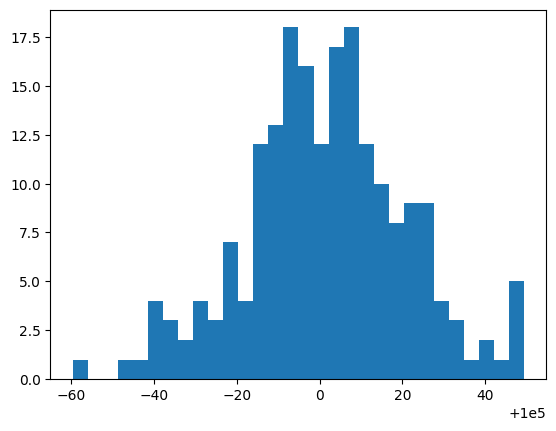

In [ ]:
plt.hist(data, bins=30)

In [ ]:
?np.random.normal

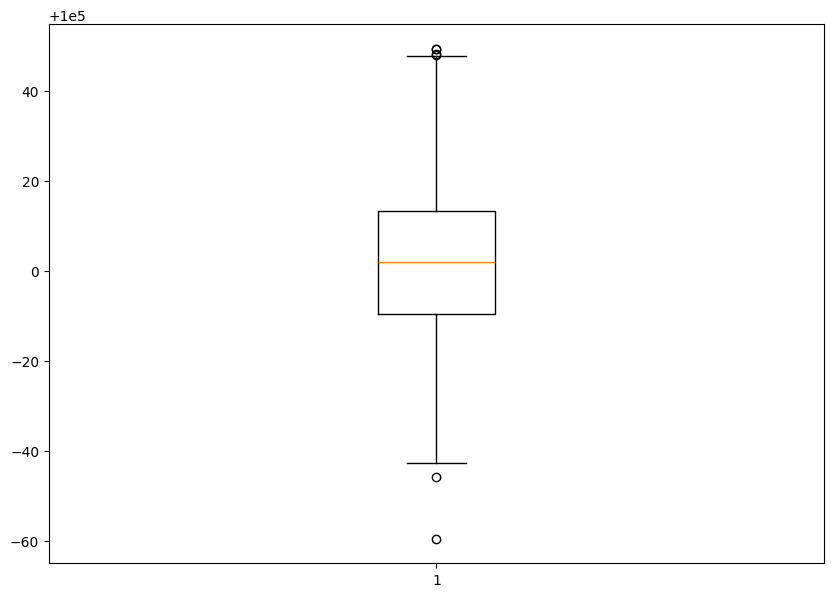

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
np.random.seed(10)
data = np.random.normal(100000, 20, 200)

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data)

# show plot
plt.show()


In [ ]:
s = 1505 # CF 2025 год


# прошло время ---2030 год---